#### Load the data and import packages:

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import os.path
import linecache


Identify data location:


If the below indicates ``TRUE`` then the data path exists.

In [3]:
local_path = '/content/drive/MyDrive/GEODYN-KAMODO Project/notebooks/ISS_GPS_analysis/'

path_to_data = '/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/'

msis86_path = path_to_data + 'MSIS86_run/'
iieout_file_86    = msis86_path + 'iieout'
print(os.path.isfile(iieout_file_86) )

jacchia71_path = path_to_data + 'DTM_run/'
iieout_file_71    = jacchia71_path + 'iieout'
print(os.path.isfile(iieout_file_71) )

DTM87_path = path_to_data + 'Jacchia_run/'
iieout_file_87    = DTM87_path + 'iieout'
print(os.path.isfile(iieout_file_87) )

True
True
True


Change path to be the folder that has the functions.


In [4]:
%load_ext autoreload
%autoreload 2

import sys  
sys.path.insert(0, '/content/drive/My Drive/GEODYN-KAMODO Project/notebooks')


#Get outout drag coefficient $C_d$

## Read the IIEOUT file to get the adjusted parameter summaries:


In [5]:

def read_parameter_adjustments(iieout_file, Sat_main):
    '''
    The below code grabs the estimated adjusted parameters for the MAIN satellite for
    the each iteration.
    The data is stored in a dictionary and includes the associated statistics:
            APRIORI  VALUE
            PREVIOUS VALUE              
            CURRENT  VALUE              
            TOTAL DELTA
            CURRENT DELTA
            APRIORI SIGMA
            CURRENT SIGMA
    The dictionary is multi-dimensional, with the first dimension being iteration 
    number and second dimension being a dictionary that contains the above data.
    '''
    # find the line numbers of all the adjustment parameters in the too big iieout file
    text_param_lists = ['XPOS',
                        'YPOS',
                        'ZPOS',
                        'XVEL',
                        'YVEL',
                        'ZVEL',
                        'CD' ]
    lines_cd = [] 
    with open(iieout_file, 'r') as f:
      for line_no, line_text in enumerate(f):
          if 'CD' in line_text:
            lines_cd.append(line_no)
            # print(line_no, line_text)
    lines = []
    SatMain_AdjustedParams = {}
    for i,val in enumerate(np.arange(1, np.size(lines_cd)+1)):
      # print(val)
      SatMain_AdjustedParams[val] = {}



    for text_param_adjusts in text_param_lists: 
      with open(iieout_file, 'r') as f:
        for line_no, line_text in enumerate(f):
            if text_param_adjusts in line_text:
              lines.append(line_no)
              # print(line, line)

      Sat_main_lines = []

      # print(check_sat)
      i=0
      for il,val_lines in enumerate(lines):
        check_sat = int(linecache.getline(iieout_file,val_lines+1)[10:18])
        check_iter = int(linecache.getline(iieout_file,lines_cd[i]-27)[57:60])
        
        if check_sat == Sat_main:
          # print(check_sat)
          # print(check_iter)

          data_1stline = linecache.getline(iieout_file,val_lines+1) #
          data_2ndtline = linecache.getline(iieout_file,val_lines+2) #
          data_3rdline = linecache.getline(iieout_file,val_lines+3) #
          # print(data_1stline)
          # print(data_2ndtline)
          # print(data_3rdline)

          apriorival = float(data_1stline[19:38])
          prevval = float(data_2ndtline[19:38])
          currentval  = float(data_3rdline[19:38])
          totalDelta = float(data_2ndtline[42:62])
          currentDelta =  float(data_3rdline[42:62])
          AprioriSigma = float(data_2ndtline[63:78])
          CurrentSigma =  float(data_3rdline[63:78])
          
          # print(text_param_adjusts)
          SatMain_AdjustedParams[check_iter][text_param_adjusts] = [apriorival,
                                                        prevval,
                                                        currentval,
                                                        totalDelta,
                                                        currentDelta,
                                                        AprioriSigma,
                                                        CurrentSigma ]
          i+=1
          i = np.mod(i,6)
          
        else:
          # print('Oops! Grabbing data for the wrong satellite: ', str(check_sat))
          continue

    return(SatMain_AdjustedParams)

In [6]:
# iieout_file_86
# iieout_file_71
# iieout_file_87

Sat_main = 9806701   
Params_dict_86 = read_parameter_adjustments(iieout_file_86, Sat_main)
Params_dict_71 = read_parameter_adjustments(iieout_file_71, Sat_main)
Params_dict_87 = read_parameter_adjustments(iieout_file_87, Sat_main)

NameError: ignored

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


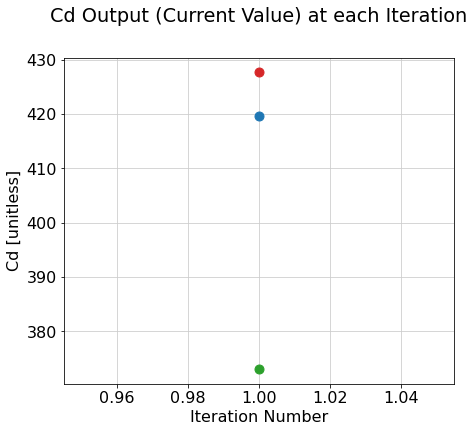

In [7]:
mpl.rcParams['lines.markersize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'

color86 = 'tab:blue'
color71 = 'tab:red'
color87 = 'tab:green'

fig, ( ax1) = plt.subplots(1, figsize=(7,6), sharex=False)
for i in Params_dict_86.keys():
  # print(i)
  ax1.set_title('Cd Output (Current Value) at each Iteration', y=1.1)
  ax1.plot(i, Params_dict_86[i]['CD'][2],'.', color = color86, label = 'MSIS')
  ax1.plot(i, Params_dict_87[i]['CD'][2],'.', color = color87, label = 'DTM')
  ax1.plot(i, Params_dict_71[i]['CD'][2],'.', color = color71, label = 'Jacchia')

  ax1.set(ylabel=  'Cd [unitless]')  
  ax1.set(xlabel=  'Iteration Number')  
  
  msis_patch = mpatches.Patch(color=color86, label='MSIS')
  dtm_patch = mpatches.Patch(color=color87, label='DTM')
  jacchia_patch = mpatches.Patch(color=color71, label='Jacchia')

  # plt.legend( ['MSIS', 'DTM','Jacchia'])
  fig.axes[0].legend( handles=[msis_patch,dtm_patch,jacchia_patch],bbox_to_anchor=(0, 1.0, 1.0, .08), ncol=3, mode="expand", borderaxespad=0.)

  fig.tight_layout( pad=1.0)


  for ax in fig.axes:
      plt.sca(ax)
      plt.xticks(rotation=45)

import os
images_dir = local_path +'plots'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)
# plt.savefig(f"{images_dir}/StateVector_comparison.png", bbox_inches='tight')
plt.savefig(f"{images_dir}/Cd_comparison.png", bbox_inches='tight')


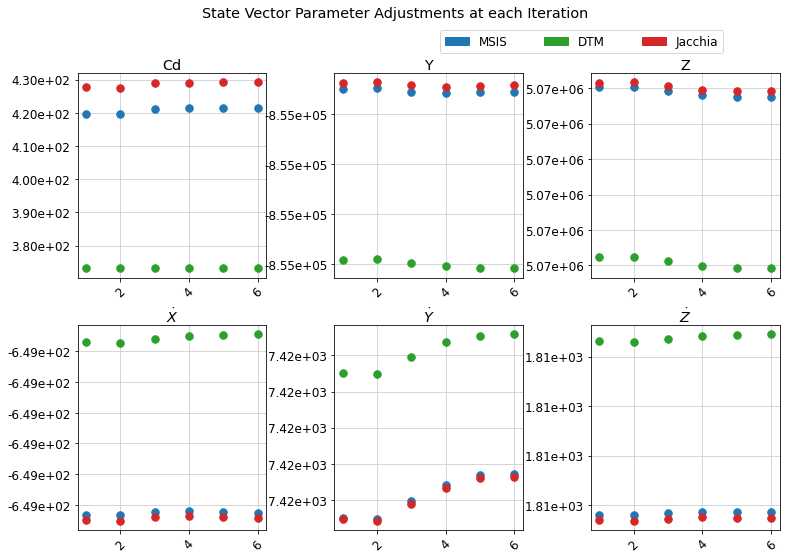

In [9]:
mpl.rcParams['lines.markersize'] = 15
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 12})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches

color86 = 'tab:blue'
color71 = 'tab:red'
color87 = 'tab:green'

fig, ( ax) = plt.subplots(2,3, figsize=(11,8), sharex=False)
# gs = fig.add_gridspec(2,3)
for i in Params_dict_86.keys():
  # print(i)
  # ax[0,0].set_title('Cd Output (Current Value) at each Iteration')
  fig.suptitle('State Vector Parameter Adjustments at each Iteration',y=0.965)
  ax[0,0].set_title('Cd')
  ax[0,0].plot(i, Params_dict_86[i]['CD'][2],'.', color = color86, label = 'MSIS')
  ax[0,0].plot(i, Params_dict_87[i]['CD'][2],'.', color = color87, label = 'DTM')
  ax[0,0].plot(i, Params_dict_71[i]['CD'][2],'.', color = color71, label = 'Jacchia')

  ax[0,1].set_title('Y')
  ax[0,1].plot(i, Params_dict_86[i]['YPOS'][2],'.', color = color86, label = 'MSIS - it. 6')
  ax[0,1].plot(i, Params_dict_87[i]['YPOS'][2],'.', color = color87, label = 'DTM - it. 6')
  ax[0,1].plot(i, Params_dict_71[i]['YPOS'][2],'.', color = color71, label = 'Jacchia - it. 6')

  ax[0,2].set_title('Z')
  ax[0,2].plot(i, Params_dict_86[i]['ZPOS'][2],'.', color = color86, label = 'MSIS - it. 6')
  ax[0,2].plot(i, Params_dict_87[i]['ZPOS'][2],'.', color = color87, label = 'DTM - it. 6')
  ax[0,2].plot(i, Params_dict_71[i]['ZPOS'][2],'.', color = color71, label = 'Jacchia - it. 6')


  ax[1,0].set_title(r'$\dot{X}$')
  ax[1,0].plot(i, Params_dict_86[i]['XVEL'][2],'.', color = color86, label = 'MSIS - it. 6')
  ax[1,0].plot(i, Params_dict_87[i]['XVEL'][2],'.', color = color87, label = 'DTM - it. 6')
  ax[1,0].plot(i, Params_dict_71[i]['XVEL'][2],'.', color = color71, label = 'Jacchia - it. 6')

  ax[1,1].set_title(r'$\dot{Y}$')
  ax[1,1].plot(i, Params_dict_86[i]['YVEL'][2],'.', color = color86, label = 'MSIS - it. 6')
  ax[1,1].plot(i, Params_dict_87[i]['YVEL'][2],'.', color = color87, label = 'DTM - it. 6')
  ax[1,1].plot(i, Params_dict_71[i]['YVEL'][2],'.', color = color71, label = 'Jacchia - it. 6')

  ax[1,2].set_title(r'$\dot{Z}$')
  ax[1,2].plot(i, Params_dict_86[i]['ZVEL'][2],'.', color = color86, label = 'MSIS - it. 6')
  ax[1,2].plot(i, Params_dict_87[i]['ZVEL'][2],'.', color = color87, label = 'DTM - it. 6')
  ax[1,2].plot(i, Params_dict_71[i]['ZVEL'][2],'.', color = color71, label = 'Jacchia - it. 6')

  # ax[1,2].text(6,Params_dict_86[i]['ZVEL'][2],  'MSIS', bbox=dict(color=color86, alpha=0.5) , fontsize = 18)
  # ax[1,2].text(6,  Params_dict_87[i]['ZVEL'][2], 'DTM', bbox=dict(color=color87, alpha=0.5) , fontsize = 18)
  # ax[1,2].text(6, Params_dict_71[i]['ZVEL'][2], 'Jacchia', bbox=dict(color=color71, alpha=0.5) , fontsize = 18)

  msis_patch = mpatches.Patch(color=color86, label='MSIS')
  dtm_patch = mpatches.Patch(color=color87, label='DTM')
  jacchia_patch = mpatches.Patch(color=color71, label='Jacchia')

  # plt.legend( ['MSIS', 'DTM','Jacchia'])
  fig.axes[2].legend( handles=[msis_patch,dtm_patch,jacchia_patch],bbox_to_anchor=(-0.8, 1.1, 1.5, .107), ncol=3, mode="expand", borderaxespad=0.)

fig.tight_layout( pad=1.0)
plt.subplots_adjust(top=0.85)     # Add space at top


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45) 
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    # ax.legend(handles=[msis_patch,dtm_patch,jacchia_patch],loc = 'best', ncol=3, mode="expand", borderaxespad=0.)


import os
images_dir = local_path +'plots'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)
plt.savefig(f"{images_dir}/StateVector_comparison.png", bbox_inches='tight')

In [ ]:
# '''
# The below code grabs the estimated adjusted parameters for the MAIN satellite for
# the each iteration.
# The data is stored in a dictionary and includes the associated statistics:
#         APRIORI  VALUE
#         PREVIOUS VALUE              
#         CURRENT  VALUE              
#         TOTAL DELTA
#         CURRENT DELTA
#         APRIORI SIGMA
#         CURRENT SIGMA
# The dictionary is multi-dimensional, with the first dimension being iteration 
# number and second dimension being a dictionary that contains the above data.
# '''

# # find the line numbers of all the adjustment parameters in the too big iieout file
# text_param_lists = ['XPOS',
#                     'YPOS',
#                     'ZPOS',
#                     'XVEL',
#                     'YVEL',
#                     'ZVEL',
#                     'CD' ]
# lines = []
# SatMain_AdjustedParams = {}
# for i,val in enumerate(np.arange(1, np.size(lines_cd)+1)):
#   # print(val)
#   SatMain_AdjustedParams[val] = {}

# lines_cd = [] 
# with open(iieout_file, 'r') as f:
#   for line_no, line_text in enumerate(f):
#       if 'CD' in line_text:
#         lines_cd.append(line_no)
#         # print(line_no, line_text)

# for text_param_adjusts in text_param_lists: 
#   with open(iieout_file, 'r') as f:
#     for line_no, line_text in enumerate(f):
#         if text_param_adjusts in line_text:
#           lines.append(line_no)
#           # print(line, line)

#   Sat_main = 9806701   
#   Sat_main_lines = []

#   # print(check_sat)
#   i=0
#   for il,val_lines in enumerate(lines):
#     check_sat = int(linecache.getline(iieout_file,val_lines+1)[10:18])
#     check_iter = int(linecache.getline(iieout_file,lines_cd[i]-27)[57:60])
    
#     if check_sat == Sat_main:
#       # print(check_sat)
#       # print(check_iter)

#       data_1stline = linecache.getline(iieout_file,val_lines+1) #
#       data_2ndtline = linecache.getline(iieout_file,val_lines+2) #
#       data_3rdline = linecache.getline(iieout_file,val_lines+3) #
#       # print(data_1stline)
#       # print(data_2ndtline)
#       # print(data_3rdline)

#       apriorival = float(data_1stline[19:38])
#       prevval = float(data_2ndtline[19:38])
#       currentval  = float(data_3rdline[19:38])
#       totalDelta = float(data_2ndtline[42:62])
#       currentDelta =  float(data_3rdline[42:62])
#       AprioriSigma = float(data_2ndtline[63:78])
#       CurrentSigma =  float(data_3rdline[63:78])
      
#       # print(text_param_adjusts)
#       SatMain_AdjustedParams[check_iter][text_param_adjusts] = [apriorival,
#                                                     prevval,
#                                                     currentval,
#                                                     totalDelta,
#                                                     currentDelta,
#                                                     AprioriSigma,
#                                                     CurrentSigma ]
#       i+=1
#       i = np.mod(i,6)
      
#     else:
#       # print('Oops! Grabbing data for the wrong satellite: ', str(check_sat))
#       continue

In [ ]:


# # find the line numbers of all the adjustment parameters in the too big iieout file
# text_param_adjusts = 'PARAMETER ADJUSTMENT SUMMARY FOR INNER ITERATION  6'
# lines = []
# with open(iieout_file, 'r') as f:
#   for line_no, line_text in enumerate(f):
#       if text_param_adjusts in line_text:
#         lines.append(line_no)
#         # print(line, line)

# Sat_main = 9806701   
# Sat_main_lines = []
# # go through the line nos and grab the data?
# for i,iline in enumerate(lines):
# # iline = lines[0]
#   data_1stline = ([linecache.getline(iieout_file,iline+5)]) #
#   # print(iline, linecache.getline(iieout_file,iline+5)[10:18])
#   try:
#     satid_param = int(linecache.getline(iieout_file,iline+5)[10:18])
#   except:
#     # print('No satellite here')
#     continue

#   if satid_param == Sat_main:
#     Sat_main_lines.append(iline+5)
#   # with open(iieout_file, 'r') as f:  # TODO: this is very slow and can be improved
#   #   for _ in range(iline+1):
#   #     f.readline() 
#   #   line = f.readline()
#     # print(line)
